In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [2]:
print(train['redemption_status'].value_counts(normalize = True))
train['redemption_status'].value_counts(normalize = True).plot.bar()

0    0.990698
1    0.009302
Name: redemption_status, dtype: float64


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


In [4]:
train.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,787.451888,0.009302
std,37126.440855,8.019215,329.966054,456.811339,0.095999
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,32260.000000,8.000000,280.000000,399.000000,0.000000
50%,64318.000000,13.000000,597.000000,781.000000,0.000000
75%,96577.000000,13.000000,857.000000,1190.000000,0.000000
max,128595.000000,30.000000,1115.000000,1582.000000,1.000000


In [5]:
train.nunique()

id                   78369
campaign_id             18
coupon_id              866
customer_id           1428
redemption_status        2
dtype: int64

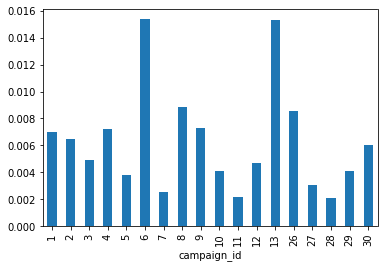

In [6]:
#train.groupby(['campaign_id'])['redemption_status'].value_counts(normalize = True).plot.bar()
train.groupby(['campaign_id'])['redemption_status'].mean().plot.bar()

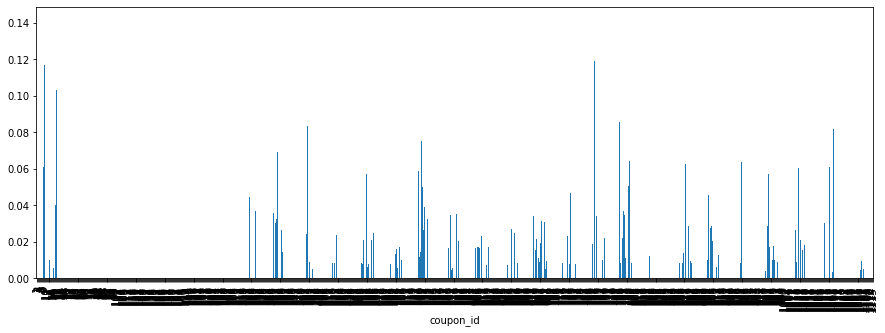

In [7]:
train.groupby(['coupon_id'])['redemption_status'].mean().plot.bar(figsize = (15,5))


In [8]:

test = pd.read_csv('test.csv')

In [9]:
train.head()
cc = train.groupby(['coupon_id'])['redemption_status'].mean()
train['coupon_prob'] = train['coupon_id'].map(cc)
test['coupon_prob']= test['coupon_id'].map(cc)

dd = train.groupby(['customer_id'])['redemption_status'].mean()
train['customer_id_prob'] = train['customer_id'].map(dd)
test['customer_id_prob']= test['customer_id'].map(dd)
test = test.fillna(-9999)

In [10]:
cd = pd.read_csv('campaign_data.csv')
cd.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [11]:
cd['start_date'] = pd.to_datetime(cd['start_date'], format = '%d/%m/%y')
cd['end_date'] = pd.to_datetime(cd['end_date'], format = '%d/%m/%y')
cd['start_day'] = cd['start_date'].dt.day
cd['start_month'] = cd['start_date'].dt.month
cd['end_day'] = cd['end_date'].dt.day
cd['end_day'] = cd['end_date'].dt.month



In [12]:
cd['duration'] = cd['end_date']-cd['start_date']
def days(x):
    return x.days
cd['duration'] = cd['duration'].apply(days)
cd = cd.drop(['start_date', 'end_date'], axis =1)
cd.head()

,campaign_id,campaign_type,start_day,start_month,end_day,duration
0,24,Y,21,10,12,60
1,25,Y,21,10,11,32
2,20,Y,7,9,11,70
3,23,Y,8,10,11,38
4,21,Y,16,9,10,32


In [13]:
train = pd.merge(train, cd, on = 'campaign_id', how = 'left')
test = pd.merge(test, cd, on = 'campaign_id', how = 'left')

In [14]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,coupon_prob,customer_id_prob,campaign_type,start_day,start_month,end_day,duration
0,1,13,27,1053,0,0.024590,0.000000,X,19,5,7,47
1,2,13,116,48,0,0.000000,0.000000,X,19,5,7,47
2,6,9,635,205,0,0.000000,0.013158,Y,11,3,4,32
3,7,13,644,1050,0,0.000000,0.000000,X,19,5,7,47
4,9,8,1017,1489,0,0.026549,0.000000,X,16,2,4,48


In [15]:
test.head()

,id,campaign_id,coupon_id,customer_id,coupon_prob,customer_id_prob,campaign_type,start_day,start_month,end_day,duration
0,3,22,869,967,-9999.000000,0.038961,X,16,9,10,32
1,4,20,389,1566,0.000000,0.000000,Y,7,9,11,70
2,5,22,981,510,0.028846,0.062500,X,16,9,10,32
3,8,25,1069,361,-9999.000000,0.000000,Y,21,10,11,32
4,10,17,498,811,-9999.000000,0.000000,Y,29,7,8,32


In [16]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train['campaign_type'] = enc.fit_transform(train['campaign_type'])
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,coupon_prob,customer_id_prob,campaign_type,start_day,start_month,end_day,duration
0,1,13,27,1053,0,0.024590,0.000000,0,19,5,7,47
1,2,13,116,48,0,0.000000,0.000000,0,19,5,7,47
2,6,9,635,205,0,0.000000,0.013158,1,11,3,4,32
3,7,13,644,1050,0,0.000000,0.000000,0,19,5,7,47
4,9,8,1017,1489,0,0.026549,0.000000,0,16,2,4,48


In [17]:
test['campaign_type'] = enc.transform(test['campaign_type'])
test.head()

,id,campaign_id,coupon_id,customer_id,coupon_prob,customer_id_prob,campaign_type,start_day,start_month,end_day,duration
0,3,22,869,967,-9999.000000,0.038961,0,16,9,10,32
1,4,20,389,1566,0.000000,0.000000,1,7,9,11,70
2,5,22,981,510,0.028846,0.062500,0,16,9,10,32
3,8,25,1069,361,-9999.000000,0.000000,1,21,10,11,32
4,10,17,498,811,-9999.000000,0.000000,1,29,7,8,32


In [18]:
trans = pd.read_csv('customer_transaction_data.csv')
trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [19]:
item_data= pd.read_csv('item_data.csv')
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [20]:
df = pd.merge(trans, item_data, on = 'item_id', how = 'left')
df.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,56,Local,Natural Products
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,524,Established,Grocery
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,1134,Established,Grocery
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,524,Established,Grocery


In [21]:
df['other_discount_percentage'] = df['other_discount']/df['selling_price']
df['coupon_discount_percentage'] = df['coupon_discount']/df['selling_price']
df.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,other_discount_percentage,coupon_discount_percentage
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products,-0.303176,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,56,Local,Natural Products,-0.259966,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,524,Established,Grocery,-0.133803,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,1134,Established,Grocery,0.000000,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,524,Established,Grocery,-0.395003,0.0


In [22]:
train['unique_days_active'] = train['customer_id'].map(df.groupby(['customer_id'])['date'].nunique())
test['unique_days_active'] = test['customer_id'].map(df.groupby(['customer_id'])['date'].nunique())

In [23]:
train['local_count'] = train['customer_id'].map(df[df['brand_type']=='Local'].groupby(['customer_id'])['date'].count())
test['local_count'] = test['customer_id'].map(df[df['brand_type']=='Local'].groupby(['customer_id'])['date'].count())

train['established_count'] = train['customer_id'].map(df[df['brand_type']=='Established'].groupby(['customer_id'])['date'].count())
test['established_count'] = test['customer_id'].map(df[df['brand_type']=='Established'].groupby(['customer_id'])['date'].count())


In [24]:
df['category'].value_counts()

Grocery                   942176
Pharmaceutical            155245
Packaged Meat              66110
Natural Products           52981
Meat                       23056
Dairy, Juices & Snacks     20465
Bakery                     18218
Fuel                       13797
Prepared Food              13069
Seafood                     7043
Skin & Hair Care            4868
Miscellaneous               3197
Flowers & Plants            1602
Alcohol                     1343
Salads                       429
Garden                       413
Travel                       247
Restauarant                  211
Vegetables (cut)              96
Name: category, dtype: int64

In [25]:
no_of_unique_items_dict = df.groupby(['customer_id'])['item_id'].nunique()
train['no_of_unique_items_ci'] = train['customer_id'].map(no_of_unique_items_dict)
test['no_of_unique_items_ci'] = test['customer_id'].map(no_of_unique_items_dict)

In [26]:
total_items_dict = df.groupby(['customer_id'])['item_id'].count()
train['total_items_ci'] = train['customer_id'].map(total_items_dict)
test['total_items_ci'] = test['customer_id'].map(total_items_dict)

In [27]:
repeated_items_dict = total_items_dict-no_of_unique_items_dict
train['repeated_items_ci'] = train['customer_id'].map(repeated_items_dict)
test['repeated_items_ci'] = test['customer_id'].map(repeated_items_dict)

In [28]:
total_quantity_dict = df.groupby(['customer_id'])['quantity'].sum()
train['total_quantity_dict'] = train['customer_id'].map(total_quantity_dict)
test['total_quantity_dict'] = test['customer_id'].map(total_quantity_dict)

In [29]:
mean_quantity_dict = total_quantity_dict/total_items_dict
train['mean_quantity_dict'] = train['customer_id'].map(mean_quantity_dict)
test['mean_quantity_dict'] = test['customer_id'].map(mean_quantity_dict)

In [30]:
highest_quantity_dict = df.groupby(['customer_id'])['quantity'].max()
train['highest_quantity_dict'] = train['customer_id'].map(highest_quantity_dict)
test['highest_quantity_dict'] = test['customer_id'].map(highest_quantity_dict)

In [31]:
total_selling_price_dict = df.groupby(['customer_id'])['selling_price'].sum()
train['total_selling_price_dict'] = train['customer_id'].map(total_selling_price_dict)
test['total_selling_price_dict'] = test['customer_id'].map(total_selling_price_dict)

In [32]:
mean_selling_price_dict = df.groupby(['customer_id'])['selling_price'].mean()
train['mean_selling_price_dict'] = train['customer_id'].map(mean_selling_price_dict)
test['mean_selling_price_dict'] = test['customer_id'].map(mean_selling_price_dict)

highest_selling_price_dict = df.groupby(['customer_id'])['selling_price'].max()
train['highest_selling_price_dict'] = train['customer_id'].map(highest_selling_price_dict)
test['highest_selling_price_dict'] = test['customer_id'].map(highest_selling_price_dict)

total_other_discount_dict = df.groupby(['customer_id'])['other_discount'].sum()
train['total_other_discount_dict'] = train['customer_id'].map(total_other_discount_dict)
test['total_other_discount_dict'] = test['customer_id'].map(total_other_discount_dict)

mean_other_discount_dict = df.groupby(['customer_id'])['other_discount'].mean()
train['mean_other_discount_dict'] = train['customer_id'].map(mean_other_discount_dict)
test['mean_other_discount_dict'] = test['customer_id'].map(mean_other_discount_dict)

highest_other_discount_dict = df.groupby(['customer_id'])['other_discount'].min()
train['highest_other_discount_dict'] = train['customer_id'].map(highest_other_discount_dict)
test['highest_other_discount_dict'] = test['customer_id'].map(highest_other_discount_dict)

other_discount_percentage_dict = df.groupby(['customer_id'])['other_discount_percentage'].sum()
train['other_discount_percentage_dict'] = train['customer_id'].map(other_discount_percentage_dict)
test['other_discount_percentage_dict'] = test['customer_id'].map(other_discount_percentage_dict)

mean_other_discount_percentage_dict = df.groupby(['customer_id'])['other_discount_percentage'].mean()
train['mean_other_discount_percentage_dict'] = train['customer_id'].map(mean_other_discount_percentage_dict)
test['mean_other_discount_percentage_dict'] = test['customer_id'].map(mean_other_discount_percentage_dict)

total_coupon_discount_dict = df.groupby(['customer_id'])['coupon_discount'].sum()
train['total_coupon_discount_dict'] = train['customer_id'].map(total_coupon_discount_dict)
test['total_coupon_discount_dict'] = test['customer_id'].map(total_coupon_discount_dict)

mean_coupon_discount_dict = df.groupby(['customer_id'])['coupon_discount'].mean()
train['mean_coupon_discount_dict'] = train['customer_id'].map(mean_coupon_discount_dict)
test['mean_coupon_discount_dict'] = test['customer_id'].map(mean_coupon_discount_dict)

highest_coupon_discount_dict = df.groupby(['customer_id'])['coupon_discount'].min()
train['highest_coupon_discount_dict'] = train['customer_id'].map(highest_coupon_discount_dict)
test['highest_coupon_discount_dict'] = test['customer_id'].map(highest_coupon_discount_dict)

coupon_discount_percentage_dict = df.groupby(['customer_id'])['coupon_discount_percentage'].sum()
train['coupon_discount_percentage_dict'] = train['customer_id'].map(coupon_discount_percentage_dict)
test['coupon_discount_percentage_dict'] = test['customer_id'].map(coupon_discount_percentage_dict)

mean_coupon_discount_percentage_dict = df.groupby(['customer_id'])['coupon_discount_percentage'].mean()
train['mean_coupon_discount_percentage_dict'] = train['customer_id'].map(mean_coupon_discount_percentage_dict)
test['mean_coupon_discount_percentage_dict'] = test['customer_id'].map(mean_coupon_discount_percentage_dict)

In [33]:
df['brand_score'] = df['brand'].map(df['brand'].value_counts(normalize=True))
df['brand_type_score'] = df['brand_type'].map(df['brand_type'].value_counts(normalize=True))
df['category_score'] = df['category'].map(df['category'].value_counts(normalize=True))

In [34]:
brand_score_dict = df.groupby(['customer_id'])['brand_score'].sum()
train['brand_score_dict'] = train['customer_id'].map(brand_score_dict)
test['brand_score_dict'] = test['customer_id'].map(brand_score_dict)

brand_type_score_dict = df.groupby(['customer_id'])['brand_type_score'].sum()
train['brand_type_score_dict'] = train['customer_id'].map(brand_type_score_dict)
test['brand_type_score_dict'] = test['customer_id'].map(brand_type_score_dict)

category_score_dict = df.groupby(['customer_id'])['category_score'].sum()
train['category_score_dict'] = train['customer_id'].map(category_score_dict)
test['category_score_dict'] = test['customer_id'].map(category_score_dict)

mean_brand_score_dict = df.groupby(['customer_id'])['brand_score'].mean()
train['mean_brand_score_dict'] = train['customer_id'].map(mean_brand_score_dict)
test['mean_brand_score_dict'] = test['customer_id'].map(mean_brand_score_dict)

mean_brand_type_score_dict = df.groupby(['customer_id'])['brand_type_score'].mean()
train['mean_brand_type_score_dict'] = train['customer_id'].map(mean_brand_type_score_dict)
test['mean_brand_type_score_dict'] = test['customer_id'].map(mean_brand_type_score_dict)

mean_category_score_dict = df.groupby(['customer_id'])['category_score'].mean()
train['mean_category_score_dict'] = train['customer_id'].map(mean_category_score_dict)
test['mean_category_score_dict'] = test['customer_id'].map(mean_category_score_dict)

In [35]:
####Item_data
ii_count_dict = df['item_id'].value_counts()
ii_other_mean = df.groupby(['item_id'])['other_discount'].mean()
ii_other_sum = df.groupby(['item_id'])['other_discount'].sum()
ii_coupon_mean = df.groupby(['item_id'])['coupon_discount'].mean()
ii_coupon_sum = df.groupby(['item_id'])['coupon_discount'].sum()
ii_other_percentage_mean = df.groupby(['item_id'])['other_discount_percentage'].mean()
ii_other_percentage_sum = df.groupby(['item_id'])['other_discount_percentage'].sum()
ii_coupon_percentage_mean = df.groupby(['item_id'])['coupon_discount_percentage'].mean()
ii_coupon_percentage_sum = df.groupby(['item_id'])['coupon_discount_percentage'].sum()

In [36]:
cim = pd.read_csv('coupon_item_mapping.csv')
cim.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [37]:
cim['ii_count'] = cim['item_id'].map(ii_count_dict)
cim['ii_other_mean'] = cim['item_id'].map(ii_other_mean)
cim['ii_other_sum'] = cim['item_id'].map(ii_other_sum)
cim['ii_coupon_mean'] = cim['item_id'].map(ii_coupon_mean)

cim['ii_other_percentage_mean'] = cim['item_id'].map(ii_other_percentage_mean)
cim['ii_other_percentage_sum'] = cim['item_id'].map(ii_other_percentage_sum)
cim['ii_coupon_percentage_mean'] = cim['item_id'].map(ii_coupon_percentage_mean)
cim['ii_coupon_percentage_sum'] = cim['item_id'].map(ii_coupon_percentage_sum)


In [38]:
#Add to train, key = coupon_id
ci_count_dict = cim.groupby(['coupon_id'])['item_id'].nunique()
train['ci_count_dict'] = train['coupon_id'].map(ci_count_dict)
test['ci_count_dict'] = test['coupon_id'].map(ci_count_dict)

ci_ii_count = cim.groupby(['coupon_id'])['ii_count'].sum()
train['ci_ii_count'] = train['coupon_id'].map(ci_ii_count)
test['ci_ii_count'] = test['coupon_id'].map(ci_ii_count)

ci_ii_other_mean = cim.groupby(['coupon_id'])['ii_other_mean'].mean()
train['ci_ii_other_mean'] = train['coupon_id'].map(ci_ii_other_mean)
test['ci_ii_other_mean'] = test['coupon_id'].map(ci_ii_other_mean)

ci_ii_other_sum = cim.groupby(['coupon_id'])['ii_other_sum'].sum()
train['ci_ii_other_sum'] = train['coupon_id'].map(ci_ii_other_sum)
test['ci_ii_other_sum'] = test['coupon_id'].map(ci_ii_other_sum)

ci_ii_coupon_mean = cim.groupby(['coupon_id'])['ii_coupon_mean'].mean()
train['ci_ii_coupon_mean'] = train['coupon_id'].map(ci_ii_coupon_mean)
test['ci_ii_coupon_mean'] = test['coupon_id'].map(ci_ii_coupon_mean)

ci_ii_other_percentage_mean = cim.groupby(['coupon_id'])['ii_other_percentage_mean'].mean()
train['ci_ii_other_percentage_mean'] = train['coupon_id'].map(ci_ii_other_percentage_mean)
test['ci_ii_other_percentage_mean'] = test['coupon_id'].map(ci_ii_other_percentage_mean)

ci_ii_other_percentage_sum = cim.groupby(['coupon_id'])['ii_other_percentage_sum'].sum()
train['ci_ii_other_percentage_sum'] = train['coupon_id'].map(ci_ii_other_percentage_sum)
test['ci_ii_other_percentage_sum'] = test['coupon_id'].map(ci_ii_other_percentage_sum)

ci_ii_coupon_percentage_mean= cim.groupby(['coupon_id'])['ii_coupon_percentage_mean'].mean()
train['ci_ii_coupon_percentage_mean'] = train['coupon_id'].map(ci_ii_coupon_percentage_mean)
test['ci_ii_coupon_percentage_mean'] = test['coupon_id'].map(ci_ii_coupon_percentage_mean)

ci_ii_coupon_percentage_sum = cim.groupby(['coupon_id'])['ii_coupon_percentage_sum'].sum()
train['ci_ii_coupon_percentage_sum'] = train['coupon_id'].map(ci_ii_coupon_percentage_sum)
test['ci_ii_coupon_percentage_sum'] = test['coupon_id'].map(ci_ii_coupon_percentage_sum)


In [39]:
train.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'coupon_prob', 'customer_id_prob', 'campaign_type', 'start_day',
       'start_month', 'end_day', 'duration', 'unique_days_active',
       'local_count', 'established_count', 'no_of_unique_items_ci',
       'total_items_ci', 'repeated_items_ci', 'total_quantity_dict',
       'mean_quantity_dict', 'highest_quantity_dict',
       'total_selling_price_dict', 'mean_selling_price_dict',
       'highest_selling_price_dict', 'total_other_discount_dict',
       'mean_other_discount_dict', 'highest_other_discount_dict',
       'other_discount_percentage_dict', 'mean_other_discount_percentage_dict',
       'total_coupon_discount_dict', 'mean_coupon_discount_dict',
       'highest_coupon_discount_dict', 'coupon_discount_percentage_dict',
       'mean_coupon_discount_percentage_dict', 'brand_score_dict',
       'brand_type_score_dict', 'category_score_dict', 'mean_brand_score_dict',
       'mean_brand_type_score_di

In [40]:
for i in (df['category'].value_counts().index):
    name = 'cat_count_' + str(i)
    #print(name)
    x = df[df['category']==i].groupby(['customer_id'])['date'].count()
    train[name] = train['customer_id'].map(x)
    test[name] = test['customer_id'].map(x)
train = train.fillna(0)
test = test.fillna(0)

    

In [41]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,coupon_prob,customer_id_prob,campaign_type,start_day,start_month,...,cat_count_Seafood,cat_count_Skin & Hair Care,cat_count_Miscellaneous,cat_count_Flowers & Plants,cat_count_Alcohol,cat_count_Salads,cat_count_Garden,cat_count_Travel,cat_count_Restauarant,cat_count_Vegetables (cut)
0,1,13,27,1053,0,0.024590,0.000000,0,19,5,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,13,116,48,0,0.000000,0.000000,0,19,5,...,5.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6,9,635,205,0,0.000000,0.013158,1,11,3,...,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,13,644,1050,0,0.000000,0.000000,0,19,5,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9,8,1017,1489,0,0.026549,0.000000,0,16,2,...,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
mat = train.corr()

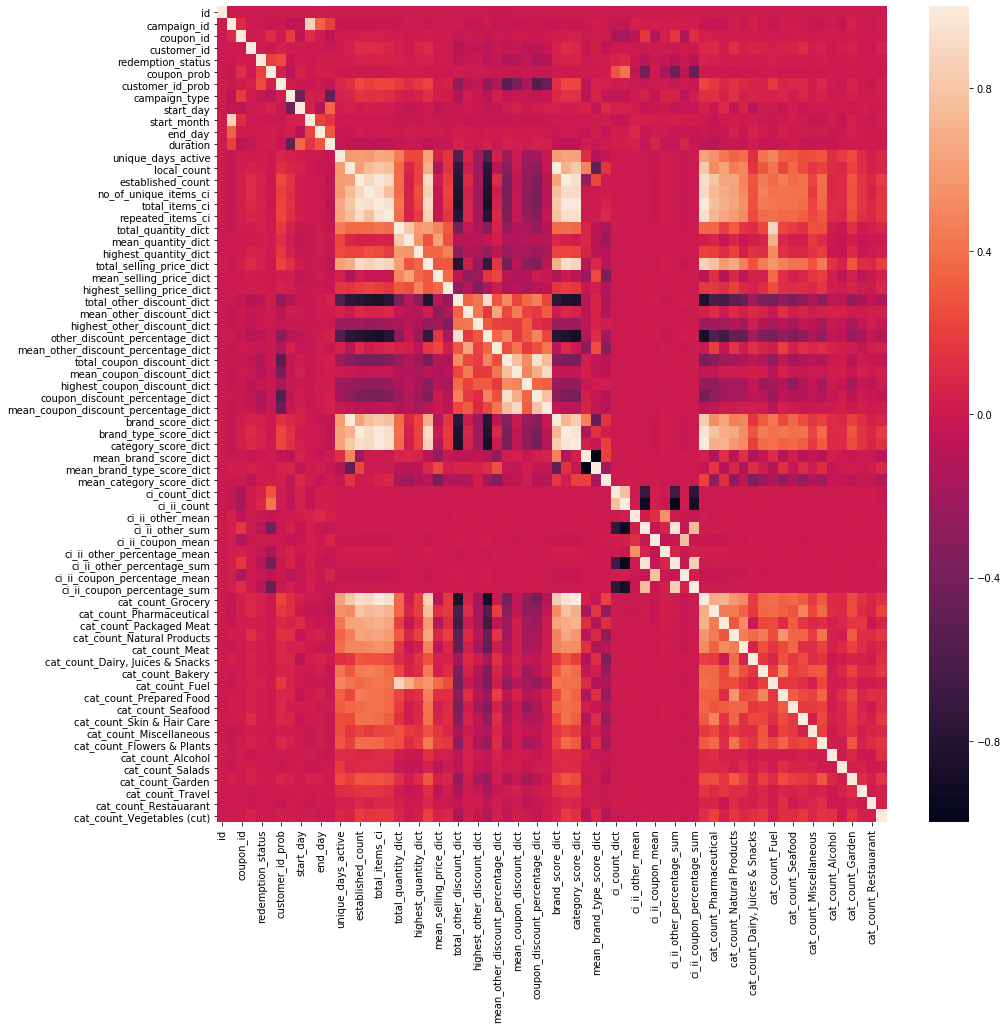

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))        
sns.heatmap(mat, ax = ax)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 68 columns):
id                                      78369 non-null int64
campaign_id                             78369 non-null int64
coupon_id                               78369 non-null int64
customer_id                             78369 non-null int64
redemption_status                       78369 non-null int64
coupon_prob                             78369 non-null float64
customer_id_prob                        78369 non-null float64
campaign_type                           78369 non-null int32
start_day                               78369 non-null int64
start_month                             78369 non-null int64
end_day                                 78369 non-null int64
duration                                78369 non-null int64
unique_days_active                      78369 non-null int64
local_count                             78369 non-null int64
established_count                

In [46]:
import numpy as np
upper = mat.where(np.triu(np.ones(mat.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop


['start_month',
 'no_of_unique_items_ci',
 'total_items_ci',
 'repeated_items_ci',
 'mean_quantity_dict',
 'total_selling_price_dict',
 'other_discount_percentage_dict',
 'coupon_discount_percentage_dict',
 'mean_coupon_discount_percentage_dict',
 'brand_score_dict',
 'brand_type_score_dict',
 'category_score_dict',
 'ci_ii_other_percentage_sum',
 'ci_ii_coupon_percentage_sum',
 'cat_count_Grocery',
 'cat_count_Fuel']

In [76]:
#Model1
X = train.drop(['id', 'redemption_status', 'coupon_prob', 'customer_id_prob'], axis = 1)
y = train['redemption_status']
test_ = test.drop(['id','coupon_prob', 'customer_id_prob'], axis = 1)
X = X.drop(X[to_drop], axis = 1)
err=[]
y_exp2=[]
test_ = test_.drop(test[to_drop], axis = 1)

from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import KFold,StratifiedKFold
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
from imblearn.over_sampling import RandomOverSampler
i=1
ros = RandomOverSampler(random_state=0)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    # random oversampling
    X_train, y_train = ros.fit_resample(X_train, y_train)
    m=LGBMClassifier(n_estimators=2000,random_state=1994,learning_rate=0.01,colsample_bytree=0.8,objective='binary',scale_pos_weight=2)
    
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)],early_stopping_rounds = 400, eval_metric='auc', verbose=200)
    preds=m.predict_proba(X_test)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(test_)[:,-1]
    i=i+1
    y_exp2.append(p)
print('roc_score: '+str(sum(err)/ len(err)))



Training until validation scores don't improve for 400 rounds.
[200]	valid_0's binary_logloss: 0.332082	valid_0's auc: 0.94466
[400]	valid_0's binary_logloss: 0.236329	valid_0's auc: 0.947732
[600]	valid_0's binary_logloss: 0.177059	valid_0's auc: 0.950529
[800]	valid_0's binary_logloss: 0.14272	valid_0's auc: 0.94878
Early stopping, best iteration is:
[578]	valid_0's binary_logloss: 0.181882	valid_0's auc: 0.950742
err:  0.9507420973513159
Training until validation scores don't improve for 400 rounds.
[200]	valid_0's binary_logloss: 0.330993	valid_0's auc: 0.934282
[400]	valid_0's binary_logloss: 0.237813	valid_0's auc: 0.938616
[600]	valid_0's binary_logloss: 0.180733	valid_0's auc: 0.939217
[800]	valid_0's binary_logloss: 0.146863	valid_0's auc: 0.939711
[1000]	valid_0's binary_logloss: 0.124536	valid_0's auc: 0.940248
[1200]	valid_0's binary_logloss: 0.109713	valid_0's auc: 0.940521
[1400]	valid_0's binary_logloss: 0.098429	valid_0's auc: 0.940283
[1600]	valid_0's binary_logloss: 0

In [75]:
#Model2
X = train.drop(['id', 'redemption_status', 'coupon_prob', 'customer_id_prob'], axis = 1)
y = train['redemption_status']
test_ = test.drop(['id','coupon_prob', 'customer_id_prob'], axis = 1)
X = X.drop(X[to_drop], axis = 1)
err=[]
y_exp1=[]
test_ = test_.drop(test[to_drop], axis = 1)


fold=StratifiedKFold(n_splits=20,shuffle=True,random_state=1994)
from imblearn.over_sampling import RandomOverSampler
i=1
ros = RandomOverSampler(random_state=0)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    # random oversampling
    
    X_train, y_train = ros.fit_resample(X_train, y_train)
    m=LGBMClassifier(n_estimators=2000,random_state=1994,learning_rate=0.01,colsample_bytree=0.8,objective='binary',scale_pos_weight=1)
    #m=XGBClassifier(n_estimators=1000,random_state=1994,learning_rate=0.03,colsample_bytree=0.5,scale_pos_weight=8)
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)],early_stopping_rounds = 200, eval_metric='auc', verbose=200)
    preds=m.predict_proba(X_test)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(test_)[:,-1]
    i=i+1
    y_exp1.append(p)
print('roc_score: '+str(sum(err)/ len(err)))

Training until validation scores don't improve for 200 rounds.
[200]	valid_0's binary_logloss: 0.28221	valid_0's auc: 0.94903
[400]	valid_0's binary_logloss: 0.19675	valid_0's auc: 0.951223
[600]	valid_0's binary_logloss: 0.1556	valid_0's auc: 0.951982
Early stopping, best iteration is:
[508]	valid_0's binary_logloss: 0.171204	valid_0's auc: 0.952365
err:  0.9523650389183619
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's binary_logloss: 0.266635	valid_0's auc: 0.942924
[400]	valid_0's binary_logloss: 0.180038	valid_0's auc: 0.948745
[600]	valid_0's binary_logloss: 0.136882	valid_0's auc: 0.949392
Early stopping, best iteration is:
[567]	valid_0's binary_logloss: 0.142294	valid_0's auc: 0.949504
err:  0.9495035994263197
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's binary_logloss: 0.277451	valid_0's auc: 0.936129
[400]	valid_0's binary_logloss: 0.194198	valid_0's auc: 0.940606
[600]	valid_0's binary_logloss: 0.151314	valid

[600]	valid_0's binary_logloss: 0.147589	valid_0's auc: 0.965725
[800]	valid_0's binary_logloss: 0.123016	valid_0's auc: 0.968058
[1000]	valid_0's binary_logloss: 0.10473	valid_0's auc: 0.970483
[1200]	valid_0's binary_logloss: 0.0907149	valid_0's auc: 0.972158
[1400]	valid_0's binary_logloss: 0.0794214	valid_0's auc: 0.972759
[1600]	valid_0's binary_logloss: 0.0713896	valid_0's auc: 0.973117
[1800]	valid_0's binary_logloss: 0.064874	valid_0's auc: 0.97331
[2000]	valid_0's binary_logloss: 0.0592706	valid_0's auc: 0.972795
Did not meet early stopping. Best iteration is:
[2000]	valid_0's binary_logloss: 0.0592706	valid_0's auc: 0.972795
err:  0.9727946648348503
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's binary_logloss: 0.268087	valid_0's auc: 0.963196
[400]	valid_0's binary_logloss: 0.186833	valid_0's auc: 0.963407
Early stopping, best iteration is:
[291]	valid_0's binary_logloss: 0.222038	valid_0's auc: 0.964101
err:  0.9641006926555613
Training until

In [ ]:
#Model3
X = train.drop(['id', 'redemption_status', 'coupon_prob', 'customer_id_prob'], axis = 1)
y = train['redemption_status']
test_ = test.drop(['id', 'coupon_prob', 'customer_id_prob'], axis = 1)
X = X.drop(X[to_drop], axis = 1)
err=[]
y_predo1=[]
test_ = test_.drop(test[to_drop], axis = 1)

from xgboost import XGBClassifier
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)

i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #m=LGBMClassifier(n_estimators=1000,random_state=1994,learning_rate=0.01,colsample_bytree=0.8,objective='binary',scale_pos_weight=1)
    m=XGBClassifier(n_estimators=4000,random_state=1994,learning_rate=0.01,colsample_bytree=0.8,scale_pos_weight=4)
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)],early_stopping_rounds = 200, eval_metric='auc', verbose=200)
    preds=m.predict_proba(X_test)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(test_)[:,-1]
    i=i+1
    y_predo1.append(p)
print('roc_score_'+str(i)+': '+str(sum(err)/ len(err)))

In [77]:
np.mean(y_exp1,0)

array([0.20728369, 0.00462815, 0.21918153, ..., 0.08976989, 0.21227113,
       0.00030331])

In [78]:
np.mean(y_exp2,0)

array([0.88611468, 0.03589977, 0.94296894, ..., 0.66074635, 0.89066822,
       0.00713575])

In [79]:
#90.33
sub = pd.DataFrame()
test11 = pd.read_csv('test.csv')
sub['id'] = test11['id']
sub['redemption_status'] = (np.mean(y_predo1,0) + np.mean(y_exp1,0) + np.mean(y_exp2,0))/3
sub.to_csv('final_sub.csv', index = False)

In [1]:
import pandas as pd
x = pd.read_csv('final_sub.csv')
y = pd.read_csv()